In [1]:
# Import Libs
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
rice_df = pd.read_excel('rice_word2vec_3mer_dataset.xlsx')
maize_df = pd.read_excel('maize_word2vec_3mer_dataset.xlsx')
df = rice_df.append(maize_df, ignore_index = True)
df

<ipython-input-3-70b441d091d2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = rice_df.append(maize_df, ignore_index = True)


,circName,stress,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,-,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,-,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,-,-31.307338,14.101101,6.012345,-38.559886,47.126226,-4.402491,-2.144210,-110.080545,...,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,-,15.773287,55.951050,71.105993,11.420289,-15.831468,-30.626971,37.164693,-23.572454,...,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,-,-44.379635,-33.514299,9.594330,-28.682953,23.765476,24.619851,-26.153289,-72.517970,...,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.237141,-16.380438,-18.462203,7.718794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,zma-circ38781--,-,-13.972886,6.107950,-25.147395,73.045038,-87.992530,-31.104236,68.620450,-49.629747,...,98.429620,7.452953,-15.737801,35.920804,61.204687,48.885356,-12.690994,-36.205666,44.758745,-17.722664
101829,zma-circ38782--,-,7.036017,-10.090989,-36.701810,24.329014,-40.458631,17.339536,-3.631819,-21.419614,...,24.790249,6.276686,-12.864078,-1.256257,42.178863,-4.007750,-10.729215,-5.812331,7.679475,-18.434670
101830,zma-circ38783--,-,-18.672884,43.651235,-33.115869,118.402164,-140.489068,-27.546500,68.986703,-92.037108,...,172.084031,18.400802,-26.153603,36.820269,153.651124,101.715267,-52.398818,-47.916956,38.571516,-17.400118
101831,zma-circ38784--,-,7.627427,-54.741109,-242.209928,153.955496,-204.570579,-41.848951,36.354824,-20.722182,...,87.106894,30.368255,-34.900771,53.611954,44.205673,-65.699111,30.057831,104.595740,81.229813,-104.068594


In [4]:
df_drought = df.query('stress == "-" or stress == "drought" or  stress == "cold"').replace('drought', 1).replace('cold', 2).replace('-', 0)

## Machine Learning Model - Supervisioned

In [5]:
# Define X and y (target) variables
X = df_drought.drop(['stress', 'circName'], axis=1)
y = df_drought['stress']

In [6]:
X.head(2)

,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.32791,18.141064
1,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.54351,28.859375


In [7]:
y.value_counts()

0    70996
1    12030
2     5724
Name: stress, dtype: int64

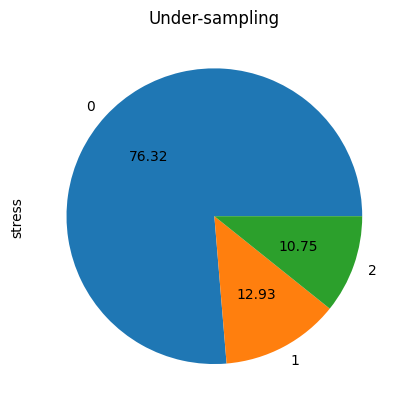

In [59]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = {0: 70996, 1: 12030, 2: 10000}) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

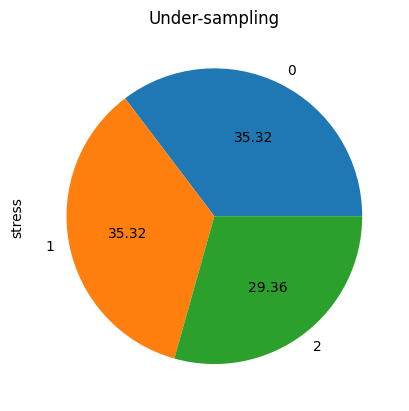

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = {0: 12030, 1: 12030, 2: 10000}) 

X_res, y_res = rus.fit_resample(X_res, y_res)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [61]:
y_res.value_counts()

0    12030
1    12030
2    10000
Name: stress, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [63]:
import lightgbm as lgb

modelo_lgb = lgb.LGBMClassifier()

modelo_lgb.fit(X_train, y_train)
y_pred = modelo_lgb.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.52      0.60      2306
           1       0.78      0.92      0.84      2491
           2       0.74      0.82      0.78      2015

    accuracy                           0.75      6812
   macro avg       0.75      0.75      0.74      6812
weighted avg       0.75      0.75      0.74      6812



In [67]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier()
modelrf.fit(X_train, y_train)

y_pred = modelrf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      2306
           1       0.79      0.91      0.84      2491
           2       0.79      0.88      0.83      2015

    accuracy                           0.78      6812
   macro avg       0.78      0.78      0.77      6812
weighted avg       0.78      0.78      0.77      6812



In [69]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.54      0.63      2306
           1       0.78      0.90      0.84      2491
           2       0.77      0.86      0.81      2015

    accuracy                           0.77      6812
   macro avg       0.76      0.77      0.76      6812
weighted avg       0.76      0.77      0.76      6812



In [70]:
from sklearn.ensemble import ExtraTreesClassifier

model_extra = ExtraTreesClassifier()
model_extra.fit(X_train, y_train)

y_pred = model_extra.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.48      0.56      2306
           1       0.78      0.92      0.85      2491
           2       0.69      0.78      0.73      2015

    accuracy                           0.73      6812
   macro avg       0.72      0.72      0.71      6812
weighted avg       0.72      0.73      0.71      6812



## Machine Learning Model - Unsupervisioned

In [77]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
components = tsne.fit_transform(X_res)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2', 'tsne_components_3'])
df_tsne['stress'] = y_res
df_tsne.head()

,tsne_components_1,tsne_components_2,tsne_components_3,stress
0,-25.974102,-15.379442,-3.484967,0
1,-5.835810,-3.203148,-6.064532,0
2,-7.827011,-7.599315,6.318151,0
3,-0.363649,-6.614669,-1.385555,0
4,-10.877034,2.433560,-8.267285,0


In [82]:
import plotly.express as px

fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='stress')
fig.show()

In [101]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.2)
df_tsne['dbscan_cluster'] = dbscan.fit_predict(df_tsne[['tsne_components_1', 'tsne_components_2', 'tsne_components_3']]).astype(str)

In [102]:
fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='dbscan_cluster')
fig.show()